# Analyzing Chicago Traffic Data
        This dataset reflects the daily volume of violations that have occurred in Children's Safety Zones for each camera. The data reflects violations that occurred from July 1, 2014 until present, minus the most recent 14 days. This data may change due to occasional time lags between the capturing of a potential violation and the processing and determination of a violation. The most recent 14 days are not shown due to revised data being submitted to the City of Chicago. The reported violations are those that have been collected by the camera and radar system and reviewed by two separate City contractors. In some instances, due to the inability the registered owner of the offending vehicle, the violation may not be issued as a citation. However, this dataset contains all violations regardless of whether a citation was issued, which provides an accurate view into the Automated Speed Enforcement Program violations taking place in Children's Safety Zones.
        

In [1]:
# import all packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



### Loading the Dataset 

In [2]:
# Build the DataFrame 
df = pd.read_csv("C:\\Users\\savan\\Speed_Camera_Violations.csv")


In [3]:
# Check dimentions of dataset
df.shape

(170521, 9)

## Columns in Datasets:


####  ADDRESS	: Object (Text)
Address of the location of the speed enforcement camera(s). There may be more than one camera at each address.

####  CAMERA ID : Object (Text)	
A unique ID associated with the physical camera at each location. There may be more than one camera at a physical address.
 
####  VIOLATION DATE : Object (Floating Timestamp)
The date of when the violations occurred. NOTE: The citation may be issued on a different date.

####  VIOLATIONS : int64 (Number)
Number of violations for each camera on a particular day.

####  X COORDINATE : float64(Number)	
The X Coordinate, measured in feet, of the location of the camera. Geocoded using Illinois State Plane East (ESRI:102671).

####  Y COORDINATE : float64(Number)
The Y Coordinate, measured in feet, of the location of the camera. Geocoded using Illinois State Plane East (ESRI:102671).

####  LATITUDE : float64(Number)	
The latitude of the physical location of the camera(s) based on the ADDRESS column. Geocoded using the WGS84.

####  LONGITUDE : float64(Number)	
The longitude of the physical location of the camera(s) based on the ADDRESS column. Geocoded using the WGS84.

####  LOCATION : object(Location)	
The coordinates of the camera(s) based on the LATITUDE and LONGITUDE columns. Geocoded using the WGS84.


In [4]:
#Check type of labels
df.dtypes

ADDRESS            object
CAMERA ID          object
VIOLATION DATE     object
VIOLATIONS          int64
X COORDINATE      float64
Y COORDINATE      float64
LATITUDE          float64
LONGITUDE         float64
LOCATION           object
dtype: object

In [5]:
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,7738 S WESTERN,CHI065,7/8/2014,65,NaN,NaN,NaN,NaN,NaN
1,1111 N HUMBOLDT,CHI010,7/16/2014,56,NaN,NaN,NaN,NaN,NaN
2,5520 S WESTERN,CHI069,7/8/2014,10,NaN,NaN,NaN,NaN,NaN
3,1111 N HUMBOLDT,CHI010,7/26/2014,101,NaN,NaN,NaN,NaN,NaN
4,1111 N HUMBOLDT,CHI010,7/27/2014,92,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VIOLATIONS,170521.0,2.888045e+01,36.636151,1.000000e+00,7.000000e+00,1.600000e+01,3.700000e+01,4.790000e+02
X COORDINATE,163959.0,1.159712e+06,15705.602414,1.121638e+06,1.149783e+06,1.159169e+06,1.167170e+06,1.203645e+06
Y COORDINATE,163959.0,1.893473e+06,32123.925092,1.820629e+06,1.868078e+06,1.898488e+06,1.920991e+06,1.943342e+06
LATITUDE,163959.0,4.186339e+01,0.088338,4.166317e+01,4.179349e+01,4.187724e+01,4.193904e+01,4.200026e+01
LONGITUDE,163959.0,-8.768923e+01,0.057135,-8.782832e+01,-8.772508e+01,-8.768980e+01,-8.766281e+01,-8.752985e+01


In [7]:
# Droping unneccesary columns
# Even we can represents camera locations using Lat/Long along with heatmap using FOLIUM

df.drop(['X COORDINATE','Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'], axis=1, inplace=True)
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS
0,7738 S WESTERN,CHI065,7/8/2014,65
1,1111 N HUMBOLDT,CHI010,7/16/2014,56
2,5520 S WESTERN,CHI069,7/8/2014,10
3,1111 N HUMBOLDT,CHI010,7/26/2014,101
4,1111 N HUMBOLDT,CHI010,7/27/2014,92


In [8]:
df.drop_duplicates(keep=False,inplace=True) 
df.shape

(170521, 4)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VIOLATIONS,170521.0,28.880449,36.636151,1.0,7.0,16.0,37.0,479.0


In [10]:
df.isnull().sum()

ADDRESS           0
CAMERA ID         0
VIOLATION DATE    0
VIOLATIONS        0
dtype: int64

In [11]:
# Adding column named as Violation Day Of Week

df['VIOLATION DAY OF WEEK'] = pd.to_datetime(df['VIOLATION DATE'], errors='coerce').dt.weekday_name

In [12]:
df.head()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,VIOLATION DAY OF WEEK
0,7738 S WESTERN,CHI065,7/8/2014,65,Tuesday
1,1111 N HUMBOLDT,CHI010,7/16/2014,56,Wednesday
2,5520 S WESTERN,CHI069,7/8/2014,10,Tuesday
3,1111 N HUMBOLDT,CHI010,7/26/2014,101,Saturday
4,1111 N HUMBOLDT,CHI010,7/27/2014,92,Sunday


In [13]:
df.tail()

,ADDRESS,CAMERA ID,VIOLATION DATE,VIOLATIONS,VIOLATION DAY OF WEEK
170516,140 N ASHLAND,CHI076,12/22/2018,14,Saturday
170517,3646 W MADISON,CHI009,12/22/2018,45,Saturday
170518,4433 N WESTERN,CHI055,12/22/2018,12,Saturday
170519,7826 S PULASKI,CHI072,12/6/2018,2,Thursday
170520,5520 S WESTERN,CHI069,12/22/2018,32,Saturday


In [14]:
df['CAMERA ID'].max()
df['VIOLATION DATE']=pd.to_datetime(df['VIOLATION DATE'])
df['VIOLATION DATE'].max()
#df.min()

Timestamp('2018-12-23 00:00:00')

## Ans: 1 ) Average # of citations issued per Camera, per Day

In [15]:
df['VIOLATIONS'].groupby([df['CAMERA ID'], df['VIOLATION DAY OF WEEK']]).mean()


CAMERA ID  VIOLATION DAY OF WEEK
CHI003     Friday                   114.546256
           Monday                   100.767857
           Saturday                 150.621145
           Sunday                   146.911504
           Thursday                 106.185022
           Tuesday                   96.951327
           Wednesday                 98.211454
CHI004     Friday                    35.004292
           Monday                    30.286957
           Saturday                  41.576923
           Sunday                    36.493562
           Thursday                  34.627706
           Tuesday                   32.549356
           Wednesday                 32.841202
CHI005     Friday                    12.940171
           Monday                    10.922414
           Saturday                  14.111111
           Sunday                    12.396552
           Thursday                  11.751073
           Tuesday                   11.094421
           Wednesday       

In [16]:
df['VIOLATIONS'].groupby(df['VIOLATION DAY OF WEEK']).sum()


VIOLATION DAY OF WEEK
Friday       753468
Monday       686724
Saturday     676715
Sunday       663801
Thursday     730603
Tuesday      708276
Wednesday    705136
Name: VIOLATIONS, dtype: int64

### A:2) On FRIDAY most # of citations are issued.

In [17]:
df.groupby('VIOLATION DAY OF WEEK').sum()[['VIOLATIONS']]
# total citations 4924723

,VIOLATIONS
VIOLATION DAY OF WEEK,
Friday,753468
Monday,686724
Saturday,676715
Sunday,663801
Thursday,730603
Tuesday,708276
Wednesday,705136


Text(0,0.5,'# of Violations')

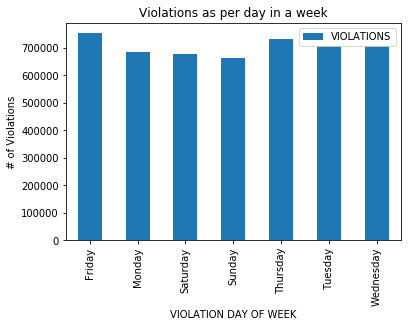

In [18]:
df.groupby('VIOLATION DAY OF WEEK').sum()[['VIOLATIONS']].plot(kind='bar')
plt.title('Violations as per day in a week')
plt.ylabel('# of Violations')

In [19]:
# Just to validate: average # of citations per day

#df['VIOLATIONS'].sum()

### Data Collection Start Date: 2014-07-01 00:00:00 & End Date: 2018-12-23 00:00:00

In [20]:
print("Data Collection Start Date: " + str(min(df['VIOLATION DATE'])) + " & End Date: " + str(max(df['VIOLATION DATE'])))

Data Collection Start Date: 2014-07-01 00:00:00 & End Date: 2018-12-23 00:00:00


## Ans: 3) As per figures, we can see # of cameras increased over the collection period.
###               We can see interesting patterns as WEEKDAYS & WEEKEND with various sampling.

Text(0,0.5,'# of cameras')

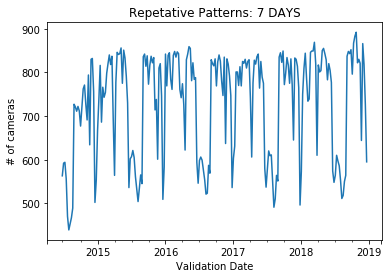

In [21]:
#df.groupby([df['VIOLATION DATE'],df['CAMERA ID']]).apply(lambda x: sum(df['sample']))

# Resampling for 7 Days

x3=(df.groupby(df['VIOLATION DATE']))['CAMERA ID'].nunique()

x3.resample('7D').sum().plot(kind='line')
plt.title('Repetative Patterns: 7 DAYS')
plt.xlabel('Validation Date')
plt.ylabel('# of cameras')
# total citations 4924723

Text(0,0.5,'# of cameras')

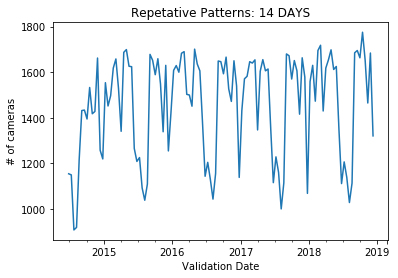

In [22]:
# Resampling for 14 days

x4=(df.groupby(df['VIOLATION DATE']))['CAMERA ID'].nunique()

x4.resample('14D').sum().plot(kind='line')
plt.title('Repetative Patterns: 14 DAYS')
plt.xlabel('Validation Date')
plt.ylabel('# of cameras')

Text(0,0.5,'# of cameras')

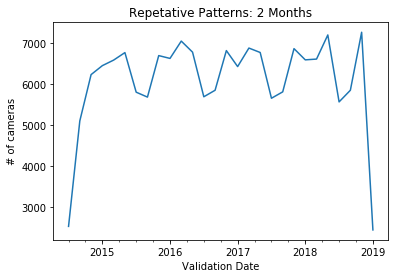

In [23]:
# Resampling for 2 months

x5=(df.groupby(df['VIOLATION DATE']))['CAMERA ID'].nunique()

x5.resample('2m').sum().plot(kind='line')
plt.title('Repetative Patterns: 2 Months')
plt.xlabel('Validation Date')
plt.ylabel('# of cameras')


Text(0,0.5,'# of cameras')

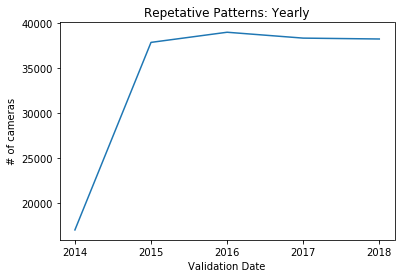

In [24]:
# Resampling for yearly

x5=(df.groupby(df['VIOLATION DATE']))['CAMERA ID'].nunique()

x5.resample('y').sum().plot(kind='line')
plt.title('Repetative Patterns: Yearly')
plt.xlabel('Validation Date')
plt.ylabel('# of cameras')

In [25]:
#(df.groupby(df['VIOLATION DAY OF WEEK']))['CAMERA ID'].nunique()
